In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/archive.zip"

Archive:  /content/drive/MyDrive/archive.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_4588.jpg  
  inflating: test_da

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.layers import Flatten,Dense,Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np

In [ ]:
train_path = "/content/test_data/test_data"
test_path = "/content/train_data/train_data"

In [ ]:
train_gen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_gen=ImageDataGenerator(rescale=1./255)

In [ ]:
train=train_gen.flow_from_directory(train_path,target_size=(224,224),batch_size=22,class_mode='categorical')
test=test_gen.flow_from_directory(test_path,target_size=(224,224),batch_size=22,class_mode='categorical')

Found 157 images belonging to 16 classes.
Found 150 images belonging to 16 classes.


In [ ]:
vgg=VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3))

In [ ]:
for layer in vgg.layers:
  layer.trainable=False

In [ ]:
x=Flatten()(vgg.output)

In [ ]:
prediction = Dense(16,activation='softmax')(x)

In [ ]:
model = Model(inputs=vgg.input,outputs=prediction)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(train,validation_data=test,epochs=15,steps_per_epoch=len(train),validation_steps=len(test))

Epoch 1/15
8/8 [==============================] - 102s 13s/step - loss: 3.3433 - accuracy: 0.1529 - val_loss: 3.0004 - val_accuracy: 0.2267
Epoch 2/15
8/8 [==============================] - 93s 13s/step - loss: 1.8838 - accuracy: 0.4586 - val_loss: 2.4549 - val_accuracy: 0.3267
Epoch 3/15
8/8 [==============================] - 95s 12s/step - loss: 1.0221 - accuracy: 0.6752 - val_loss: 2.4312 - val_accuracy: 0.3267
Epoch 4/15
8/8 [==============================] - 96s 12s/step - loss: 0.6513 - accuracy: 0.8217 - val_loss: 2.1358 - val_accuracy: 0.3800
Epoch 5/15
8/8 [==============================] - 94s 12s/step - loss: 0.4195 - accuracy: 0.8726 - val_loss: 2.3616 - val_accuracy: 0.3933
Epoch 6/15
8/8 [==============================] - 96s 13s/step - loss: 0.3495 - accuracy: 0.8854 - val_loss: 2.5148 - val_accuracy: 0.4000
Epoch 7/15
8/8 [==============================] - 95s 13s/step - loss: 0.3765 - accuracy: 0.8917 - val_loss: 2.1419 - val_accuracy: 0.4333
Epoch 8/15
8/8 [==========

In [ ]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

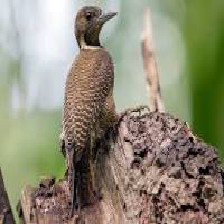

In [ ]:
img = image.load_img('/content/bird.jpeg',target_size=(224,224,3))
img

In [ ]:
img = image.img_to_array(img)
img

array([[[218., 225., 231.],
        [217., 224., 230.],
        [217., 224., 230.],
        ...,
        [108., 130.,  65.],
        [108., 130.,  65.],
        [108., 130.,  65.]],

       [[218., 225., 231.],
        [217., 224., 230.],
        [217., 224., 230.],
        ...,
        [107., 130.,  62.],
        [107., 130.,  62.],
        [107., 130.,  62.]],

       [[218., 225., 231.],
        [217., 224., 230.],
        [217., 224., 230.],
        ...,
        [107., 130.,  62.],
        [107., 130.,  62.],
        [107., 130.,  62.]],

       ...,

       [[177., 150., 129.],
        [173., 151., 130.],
        [112.,  95.,  79.],
        ...,
        [ 22.,   2.,   0.],
        [ 39.,  19.,  10.],
        [ 79.,  56.,  48.]],

       [[177., 150., 129.],
        [173., 151., 130.],
        [112.,  95.,  79.],
        ...,
        [ 22.,   2.,   0.],
        [ 39.,  19.,  10.],
        [ 79.,  56.,  48.]],

       [[166., 140., 117.],
        [147., 125., 104.],
        [ 94.,  

In [ ]:
img = np.expand_dims(img,axis=0)
img

array([[[[218., 225., 231.],
         [217., 224., 230.],
         [217., 224., 230.],
         ...,
         [108., 130.,  65.],
         [108., 130.,  65.],
         [108., 130.,  65.]],

        [[218., 225., 231.],
         [217., 224., 230.],
         [217., 224., 230.],
         ...,
         [107., 130.,  62.],
         [107., 130.,  62.],
         [107., 130.,  62.]],

        [[218., 225., 231.],
         [217., 224., 230.],
         [217., 224., 230.],
         ...,
         [107., 130.,  62.],
         [107., 130.,  62.],
         [107., 130.,  62.]],

        ...,

        [[177., 150., 129.],
         [173., 151., 130.],
         [112.,  95.,  79.],
         ...,
         [ 22.,   2.,   0.],
         [ 39.,  19.,  10.],
         [ 79.,  56.,  48.]],

        [[177., 150., 129.],
         [173., 151., 130.],
         [112.,  95.,  79.],
         ...,
         [ 22.,   2.,   0.],
         [ 39.,  19.,  10.],
         [ 79.,  56.,  48.]],

        [[166., 140., 117.],
       

In [ ]:
pred = np.argmax(model.predict(img))
print(pred)
output=['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 20ms/step
3
cbrtsh


In [ ]:
model.save("birds.h5")